<a href="https://colab.research.google.com/github/AnuS2003/Portfolio-Projects/blob/main/Glassdoor_job_postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning on glassdoor job postings**

**PROBLEM OVERVIEW:**
In today's cutthroat job market, job seekers face challenge in finding their dream roles. The demand for data science professionals is skyrocketing, but here's the heart of the issue: not every company comprehends the precise skill set they require.  This results in a deluge of job listings that are frustratingly vague and broad, leaving job seekers perplexed and disheartened.

Imagine the frustration of countless aspiring data scientists and job seekers, tirelessly scrolling through endless job postings, each one a vague promise of opportunity. The bewildering array of titles, responsibilities, and qualifications creates a maze of confusion. How can one possibly discern their true calling or tailor their skills and qualifications to meet the nebulous demands of these listings?

Now, shift your perspective to the other side of the equation. Picture the plight of recruiters and employers desperately seeking the perfect fit for their organizations. The lack of clarity in job postings becomes a barrier, hindering their ability to identify the right talent and grow their businesses effectively.

**PROJECT GOALS:**
1. Prepare data by cleaning and refining it for analysis.
2. Explore data to reveal patterns, valuable information, and typical expectations in data science jobs.
3. Pinpoint critical elements affecting job titles, pay, and other job criteria.
4. Offer practical advice for job seekers to enhance their skills and assist employers in enhancing their job listings.



**TARGET AUDIENCE:**
1. **Aspiring data scientists and Job seekers:**Insights will provide a clear roadmap, helping them decipher the skills and qualifications needed for their dream job roles, and gaining a deep understanding of the dynamic data science industry to align their interests effectively.
2. **Recruiters and Employers:** Insights will empower them to expand their team's skillset and identify untapped potential candidates, driving growth and success for their business.



In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Uncleaned_DS_jobs.csv',index_col='index')
df.head()


Job Title               Salary Estimate  \
index                                                    
0      Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1         Data Scientist  $137K-$171K (Glassdoor est.)   
2         Data Scientist  $137K-$171K (Glassdoor est.)   
3         Data Scientist  $137K-$171K (Glassdoor est.)   
4         Data Scientist  $137K-$171K (Glassdoor est.)   

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

                  Company Name       Location            Headquarters  \
index                                                                   
0             Healthfirst\n3.1   New York, NY            New York, NY   
1                 ManTech\n4.2  Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8     Boston, MA              Boston, MA   
3                 INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9   New York, NY            New York, NY   

                          Size  Founded        Type of ownership  \
index                                                              
0       1001 to 5000 employees     1993   Nonprofit Organization   
1      5001 to 10000 employees     1968         Company - Public   
2       1001 to 5000 employees     1981  Private Practice / Firm   
3        501 to 1000 employees     2000         Company - Public   
4          51 to 200 employees     1998        Company - Private   

                                    Industry             Sector  \
index                                                             
0                         Insurance Carriers          Insurance   
1                     Research & Development  Business Services   
2                                 Consulting  Business Services   
3      Electrical & Electronic Manufacturing      Manufacturing   
4                    Advertising & Marketing  Business Services   

                          Revenue  \
index                               
0        Unknown / Non-Applicable   
1          $1 to $2 billion (USD)   
2      $100 to $500 million (USD)   
3      $100 to $500 million (USD)   
4        Unknown / Non-Applicable   

                                             Competitors  
index                                                     
0                EmblemHealth, UnitedHealth Group, Aetna  
1                                                     -1  
2                                                     -1  
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4                   Commerce Signals, Cardlytics, Yodlee

In [ ]:
df.shape

(672, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


In [ ]:
df.describe()

Rating      Founded
count  672.000000   672.000000
mean     3.518601  1635.529762
std      1.410329   756.746640
min     -1.000000    -1.000000
25%      3.300000  1917.750000
50%      3.800000  1995.000000
75%      4.300000  2009.000000
max      5.000000  2019.000000

From the above, there are 672 rows and 14 columns. Float, integer and objects are the data types present in the dataset.

Things to be noted:
'index' column is already present in the dataset.Either you can load the dataset by mentioning index column or you can delete the column.
We can change 'Salary Estimate' from object to integer.

Before mainpulating the data, it is better to copy the data so that the original data is unaltered.


In [ ]:
data=df.copy()
data.head()

Job Title               Salary Estimate  \
index                                                    
0      Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1         Data Scientist  $137K-$171K (Glassdoor est.)   
2         Data Scientist  $137K-$171K (Glassdoor est.)   
3         Data Scientist  $137K-$171K (Glassdoor est.)   
4         Data Scientist  $137K-$171K (Glassdoor est.)   

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

                  Company Name       Location            Headquarters  \
index                                                                   
0             Healthfirst\n3.1   New York, NY            New York, NY   
1                 ManTech\n4.2  Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8     Boston, MA              Boston, MA   
3                 INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9   New York, NY            New York, NY   

                          Size  Founded        Type of ownership  \
index                                                              
0       1001 to 5000 employees     1993   Nonprofit Organization   
1      5001 to 10000 employees     1968         Company - Public   
2       1001 to 5000 employees     1981  Private Practice / Firm   
3        501 to 1000 employees     2000         Company - Public   
4          51 to 200 employees     1998        Company - Private   

                                    Industry             Sector  \
index                                                             
0                         Insurance Carriers          Insurance   
1                     Research & Development  Business Services   
2                                 Consulting  Business Services   
3      Electrical & Electronic Manufacturing      Manufacturing   
4                    Advertising & Marketing  Business Services   

                          Revenue  \
index                               
0        Unknown / Non-Applicable   
1          $1 to $2 billion (USD)   
2      $100 to $500 million (USD)   
3      $100 to $500 million (USD)   
4        Unknown / Non-Applicable   

                                             Competitors  
index                                                     
0                EmblemHealth, UnitedHealth Group, Aetna  
1                                                     -1  
2                                                     -1  
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4                   Commerce Signals, Cardlytics, Yodlee

Data Cleaning

In [ ]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(13, 14)

In [ ]:
data[data.duplicated()]

Job Title               Salary Estimate  \
index                                                            
135    Machine Learning Engineer   $90K-$109K (Glassdoor est.)   
136         Senior Data Engineer   $90K-$109K (Glassdoor est.)   
358               Data Scientist  $122K-$146K (Glassdoor est.)   
359               Data Scientist  $122K-$146K (Glassdoor est.)   
360               Data Scientist  $122K-$146K (Glassdoor est.)   
361               Data Scientist  $122K-$146K (Glassdoor est.)   
362               Data Scientist  $122K-$146K (Glassdoor est.)   
389               Data Scientist  $110K-$163K (Glassdoor est.)   
496               Data Scientist   $95K-$119K (Glassdoor est.)   
497               Data Scientist   $95K-$119K (Glassdoor est.)   
498               Data Scientist   $95K-$119K (Glassdoor est.)   
499               Data Scientist   $95K-$119K (Glassdoor est.)   
500               Data Scientist   $95K-$119K (Glassdoor est.)   

                                         Job Description  Rating  \
index                                                              
135    Role Description\nTriplebyte screens and evalu...     3.2   
136    Lendio is looking to fill a position for a Sen...     4.9   
358    Job Overview: The Data Scientist is a key memb...    -1.0   
359    Job Overview: The Data Scientist is a key memb...    -1.0   
360    Job Overview: The Data Scientist is a key memb...    -1.0   
361    Job Overview: The Data Scientist is a key memb...    -1.0   
362    Job Overview: The Data Scientist is a key memb...    -1.0   
389    Job Description\nAs a Data Scientist, you will...    -1.0   
496    Job Overview: The Data Scientist is a key memb...    -1.0   
497    Job Overview: The Data Scientist is a key memb...    -1.0   
498    Job Overview: The Data Scientist is a key memb...    -1.0   
499    Job Overview: The Data Scientist is a key memb...    -1.0   
500    Job Overview: The Data Scientist is a key memb...    -1.0   

          Company Name           Location       Headquarters  \
index                                                          
135    Triplebyte\n3.2             Remote  San Francisco, CA   
136        Lendio\n4.9           Lehi, UT           Lehi, UT   
358     Hatch Data Inc  San Francisco, CA                 -1   
359     Hatch Data Inc  San Francisco, CA                 -1   
360     Hatch Data Inc  San Francisco, CA                 -1   
361     Hatch Data Inc  San Francisco, CA                 -1   
362     Hatch Data Inc  San Francisco, CA                 -1   
389             HireAi  San Francisco, CA                 -1   
496     Hatch Data Inc  San Francisco, CA                 -1   
497     Hatch Data Inc  San Francisco, CA                 -1   
498     Hatch Data Inc  San Francisco, CA                 -1   
499     Hatch Data Inc  San Francisco, CA                 -1   
500     Hatch Data Inc  San Francisco, CA                 -1   

                       Size  Founded  Type of ownership  \
index                                                     
135     51 to 200 employees     2015  Company - Private   
136    201 to 500 employees     2011  Company - Private   
358                      -1       -1                 -1   
359                      -1       -1                 -1   
360                      -1       -1                 -1   
361                      -1       -1                 -1   
362                      -1       -1                 -1   
389                      -1       -1                 -1   
496                      -1       -1                 -1   
497                      -1       -1                 -1   
498                      -1       -1                 -1   
499                      -1       -1                 -1   
500                      -1       -1                 -1   

                           Industry                  Sector  \
index                                                         
135    Computer Hardware & Software  I

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(659, 14)

## 1. Job Title

In [ ]:
data['Job Title'].nunique()


172

In [ ]:
data['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

There are 172 unique job titles. The problem encountered is there are job of non-datascience roles. We need to highlight data science roles with the information related to the description of the role. e.g. skills, abbreviations, etc. This text is irrelevant except in the case it specifies the seniority. e.g. (Sr.) which should be replaced to Senior after that all the parenthesis instances along with its information can be deleted

In [ ]:
ds_role_keywords=['Data','Data Analyst','Data Engineer','Data Scientist','Analytics','Developer','Machine Learning','Business Intelligence Analyst',]

ds_job_role=data[data['Job Title'].str.contains('|'.join(ds_role_keywords),case=True)]

In [ ]:
data['Job Title']=data.loc[:,'Job Title'].str.replace(r'\[^()]+\)','',regex=True)

In [ ]:
data['Job Title']=data['Job Title'].str.replace('Sr','Senior')


In [ ]:
df['Job Title'].value_counts()

Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64

In [ ]:
def update_job_roles(title):
  if pd.notna(title):
    title=title.lower()
    if 'data science' in title or 'data scientist' in title:
      return 'Data Scientist' +('- Senior' if 'senior' in title in title else' ')
    elif 'data analyst' in title or 'data analysis ' in title:
      return 'Data Analyst' +('-Senior' if 'senior' in title else' ')
    elif 'business intelligence' in title:
      return 'BI Analyst' +('- Senior' if 'senior' in title else' ')
    elif 'ml' in title or 'ai' in title or 'machine learning engineer' in title:
      return 'ML Engineer' +('- Senior' if 'senior' in title else' ')
    elif 'data engineer' in title or 'data analytics engineer' in title or 'data integration and modeling engineer' in title or 'production engineer - statistics/data analysis' in title or 'principal data & analytics platform engineer' in title:
            return 'Data Engineer'+ (' - Senior' if 'senior' in title else '')
    elif 'analytics manager' in title:
            return 'Analytics Manager'
    elif 'data modeler' in title:
            return 'Data Modeler'
    elif 'data architect' in title:
            return 'Data Architect'
    else:
      updated_title = title

    if re.search(r'\b(lead|head|manager|vp)\b', title):
            role_match = re.search(r'\b(lead|head|manager|vp)\b', title).group(0)
            updated_title = f'{role_match.title()} {updated_title}'
    return updated_title

data['Updated_Job_Title'] = data['Job Title'].apply(update_job_roles)

In [ ]:
data.head(2)

Job Title               Salary Estimate  \
index                                                        
0      Senior Data Scientist  $137K-$171K (Glassdoor est.)   
1             Data Scientist  $137K-$171K (Glassdoor est.)   

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   

           Company Name       Location  Headquarters                     Size  \
index                                                                           
0      Healthfirst\n3.1   New York, NY  New York, NY   1001 to 5000 employees   
1          ManTech\n4.2  Chantilly, VA   Herndon, VA  5001 to 10000 employees   

       Founded       Type of ownership                Industry  \
index                                                            
0         1993  Nonprofit Organization      Insurance Carriers   
1         1968        Company - Public  Research & Development   

                  Sector                   Revenue  \
index                                                
0              Insurance  Unknown / Non-Applicable   
1      Business Services    $1 to $2 billion (USD)   

                                   Competitors       Updated_Job_Title  
index                                                                   
0      EmblemHealth, UnitedHealth Group, Aetna  Data Scientist- Senior  
1                                           -1         Data Scientist

In [ ]:
data['Updated_Job_Title'].value_counts()

Data Scientist                                                                                      421
Data Engineer                                                                                        45
Data Scientist- Senior                                                                               42
Data Analyst                                                                                         33
ML Engineer                                                                                          19
Data Analyst-Senior                                                                                  14
Data Modeler                                                                                          5
Data Engineer - Senior                                                                                5
engineer - computer scientist - research computer scientist - signal processing - san antonio or      4
senior machine learning scientist - bay area, ca                

Job seekers rely on it to quickly identify positions that match their skills and aspirations, while recruiters use it to attract candidates whose career objectives align with the role, streamlining the hiring process.

## 2.Salary Estimate


In [ ]:
data['Salary Estimate']= data['Salary Estimate'].apply(lambda x: x.split('(')[0])
data['Salary Estimate']=data['Salary Estimate'].apply(lambda x:x.replace('K','000'))

In [ ]:
data['Salary Estimate'] = data['Salary Estimate'].str.replace('[\$,]', '', regex=True)

In [ ]:
data['Salary Estimate'].head(3)

index
0    137000-171000 
1    137000-171000 
2    137000-171000 
Name: Salary Estimate, dtype: object

In [ ]:
data['Min Salary'] = data['Salary Estimate'].apply(lambda x:int(x.split('-')[0]))

In [ ]:
data['Max Salary'] = data['Salary Estimate'].apply(lambda x:int(x.split('-')[1]))

In [ ]:
data['Avg Salary'] =(data['Min Salary']+data['Max Salary'])// 2

In [ ]:
data.head()

Job Title Salary Estimate  \
index                                          
0      Senior Data Scientist  137000-171000    
1             Data Scientist  137000-171000    
2             Data Scientist  137000-171000    
3             Data Scientist  137000-171000    
4             Data Scientist  137000-171000    

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

                  Company Name       Location            Headquarters  \
index                                                                   
0             Healthfirst\n3.1   New York, NY            New York, NY   
1                 ManTech\n4.2  Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8     Boston, MA              Boston, MA   
3                 INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9   New York, NY            New York, NY   

                          Size  Founded        Type of ownership  \
index                                                              
0       1001 to 5000 employees     1993   Nonprofit Organization   
1      5001 to 10000 employees     1968         Company - Public   
2       1001 to 5000 employees     1981  Private Practice / Firm   
3        501 to 1000 employees     2000         Company - Public   
4          51 to 200 employees     1998        Company - Private   

                                    Industry             Sector  \
index                                                             
0                         Insurance Carriers          Insurance   
1                     Research & Development  Business Services   
2                                 Consulting  Business Services   
3      Electrical & Electronic Manufacturing      Manufacturing   
4                    Advertising & Marketing  Business Services   

                          Revenue  \
index                               
0        Unknown / Non-Applicable   
1          $1 to $2 billion (USD)   
2      $100 to $500 million (USD)   
3      $100 to $500 million (USD)   
4        Unknown / Non-Applicable   

                                             Competitors  \
index                                                      
0                EmblemHealth, UnitedHealth Group, Aetna   
1                                                     -1   
2                                                     -1   
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   
4                   Commerce Signals, Cardlytics, Yodlee   

            Updated_Job_Title  Min Salary  Max Salary  Avg Salary  
index                                                              
0      Data Scientist- Senior      137000      171000      154000  
1             Data Scientist       137000      171000      154000  
2             Data Scientist       137000      171000      154000  
3             Data Scientist       137000      171000      154000  
4             Data Scientist       137000      171000      154000

 Job seekers can better understand the potential salary range for data science roles in different companies, enabling them to make informed decisions, while recruiters can leverage this information to attract candidates by offering competitive compensation packages.




## 3.Job Description

In [ ]:
data['Job Description'][0].split("\n\n")

['Description',
 'The Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.',
 'Duties & Responsibilities:',
 '• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from int

In [ ]:
skills=['Python', 'R','SAS','Excel','SQL','Power BI', 'Tableau', 'Hadoop', 'Spark','ML','AWS']
for technical_skills in skills:
  data[technical_skills]=0
for technical_skills in skills:
  data[technical_skills]=data['Job Description'].str.contains(technical_skills, case=False, na=False).astype(int)

In [ ]:
data.head(3)

Job Title Salary Estimate  \
index                                          
0      Senior Data Scientist  137000-171000    
1             Data Scientist  137000-171000    
2             Data Scientist  137000-171000    

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   

              Company Name       Location  Headquarters  \
index                                                     
0         Healthfirst\n3.1   New York, NY  New York, NY   
1             ManTech\n4.2  Chantilly, VA   Herndon, VA   
2      Analysis Group\n3.8     Boston, MA    Boston, MA   

                          Size  Founded        Type of ownership  ...  R SAS  \
index                                                             ...          
0       1001 to 5000 employees     1993   Nonprofit Organization  ...  1   0   
1      5001 to 10000 employees     1968         Company - Public  ...  1   0   
2       1001 to 5000 employees     1981  Private Practice / Firm  ...  1   0   

      Excel SQL Power BI  Tableau  Hadoop  Spark  ML  AWS  
index                                                      
0         0   0        0        0       0      0   0    1  
1         0   1        0        0       1      0   0    0  
2         1   0        0        0       0      0   0    1  

[3 rows x 29 columns]

In [ ]:
def type_of_work(description):
    keywords = []
    if 'remote' in description.lower():
        keywords.append('Remote')
    if 'hybrid' in description.lower():
        keywords.append('Hybrid')
    if 'office' in description.lower():
        keywords.append('Office')
    return ', '.join(keywords) if keywords else 'Not Specified'

# Create a new column 'Location_Preference' and apply the function to the 'Job Description' column
data['Work_Preference'] = data['Job Description'].apply(type_of_work)

data['Work_Preference'].value_counts()

Not Specified     475
Office            114
Remote             44
Remote, Office     19
Hybrid              6
Hybrid, Office      1
Name: Work_Preference, dtype: int64

When job seekers pick out the important skills and job preferences mentioned in data science job listings,job seekers can decipher the key skills and preferences, gaining insight into employers' expectations, while recruiters can utilize this data to identify fitting candidates for their company.

## 4.Rating

In [ ]:
data['Rating'].value_counts()

 3.5    58
 4.0    41
 3.3    41
 3.9    40
-1.0    39
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    20
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    10
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: Rating, dtype: int64

In [ ]:
data['Rating']=data['Rating'].replace(-1,0)


In [ ]:
data['Rating'].value_counts().sort_index(ascending=False)

5.0    36
4.9    10
4.8    20
4.7    22
4.6    12
4.5    32
4.4    24
4.3    14
4.2    29
4.1    25
4.0    41
3.9    40
3.8    39
3.7    38
3.6    31
3.5    58
3.4    31
3.3    41
3.2    20
3.1    12
3.0     7
2.9    14
2.8     3
2.7    10
2.6     4
2.5     2
2.4     1
2.3     1
2.2     1
2.1     1
2.0     1
0.0    39
Name: Rating, dtype: int64

 Ratings are typically provided by current or former employees and can cover various aspects of the company, such as the work environment, company culture, compensation, and job satisfaction. Job seekers can use these ratings to make more informed decisions about potential employers. Recruiters and employers, on the other hand, may use these ratings to understand how their company is perceived by job seekers and to identify areas where they can improve their employer brand to attract top talent.







## 5.Company Name

In [ ]:
data['Company Name']= data['Company Name'].apply(lambda x: x.split('\n')[0])

data['Company Name']

index
0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 659, dtype: object

In [ ]:
data['Company Name'].value_counts()

Maxar Technologies             12
Tempus Labs                    11
AstraZeneca                    10
Klaviyo                         8
Autodesk                        7
                               ..
Better Hire                     1
Rincon Research Corporation     1
Descript                        1
Trace Data                      1
ChaTeck Incorporated            1
Name: Company Name, Length: 432, dtype: int64

In [ ]:
data['Company Name'].nunique()

432

In [ ]:
data['Location']=data['Location'].apply(lambda x: x.split(',')[0])
data['Location']

index
0           New York
1          Chantilly
2             Boston
3             Newton
4           New York
           ...      
667         Fort Lee
668    San Francisco
669        Irwindale
670    San Francisco
671         New York
Name: Location, Length: 659, dtype: object

In [ ]:
data['Location'].value_counts().sort_index(ascending=False)

Yakima        1
Woodlawn      1
Woodbridge    1
Woburn        3
Winters       1
             ..
Ann Arbor     2
Alpharetta    2
Alexandria    4
Akron         1
Adelphi       2
Name: Location, Length: 204, dtype: int64

In [ ]:
data['Headquarters']=data['Headquarters'].apply(lambda x: x.split(',')[0])
data['Headquarters']

index
0         New York
1          Herndon
2           Boston
3        Bad Ragaz
4         New York
          ...     
667       Fort Lee
668             -1
669             -1
670    Santa Clara
671    Carle Place
Name: Headquarters, Length: 659, dtype: object

In [ ]:
data['Headquarters'].value_counts().sort_index(ascending=False)

Zurich          1
Yakima          1
Woodbridge      1
Woodbine        7
Woburn          3
               ..
Alexandria      3
Albuquerque     1
Albertville     1
Akron           1
-1             20
Name: Headquarters, Length: 222, dtype: int64

In [ ]:
data['Headquarters']=data['Headquarters'].str.replace('-1','Unknown')
data['Headquarters']

index
0         New York
1          Herndon
2           Boston
3        Bad Ragaz
4         New York
          ...     
667       Fort Lee
668        Unknown
669        Unknown
670    Santa Clara
671    Carle Place
Name: Headquarters, Length: 659, dtype: object

Including the company name in job postings is vital for both job seekers and recruiters. It fosters transparency, helps job seekers make informed choices based on company reputation and values, and allows recruiters to attract candidates who align with their organization's brand and goals. This practice builds trust and streamlines the hiring process for all parties involved.

## 5.Size

In [ ]:
data['Size']

index
0       1001 to 5000 employees
1      5001 to 10000 employees
2       1001 to 5000 employees
3        501 to 1000 employees
4          51 to 200 employees
                ...           
667     1001 to 5000 employees
668                         -1
669                         -1
670          1 to 50 employees
671     1001 to 5000 employees
Name: Size, Length: 659, dtype: object

In [ ]:
data.head()

Job Title Salary Estimate  \
index                                          
0      Senior Data Scientist  137000-171000    
1             Data Scientist  137000-171000    
2             Data Scientist  137000-171000    
3             Data Scientist  137000-171000    
4             Data Scientist  137000-171000    

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

             Company Name   Location Headquarters                     Size  \
index                                                                        
0             Healthfirst   New York     New York   1001 to 5000 employees   
1                 ManTech  Chantilly      Herndon  5001 to 10000 employees   
2          Analysis Group     Boston       Boston   1001 to 5000 employees   
3                 INFICON     Newton    Bad Ragaz    501 to 1000 employees   
4      Affinity Solutions   New York     New York      51 to 200 employees   

       Founded        Type of ownership  ... SAS Excel SQL Power BI Tableau  \
index                                    ...                                  
0         1993   Nonprofit Organization  ...   0     0   0        0       0   
1         1968         Company - Public  ...   0     0   1        0       0   
2         1981  Private Practice / Firm  ...   0     1   0        0       0   
3         2000         Company - Public  ...   0     1   1        0       0   
4         1998        Company - Private  ...   1     1   1        0       0   

       Hadoop  Spark  ML  AWS  Work_Preference  
index                                           
0           0      0   0    1    Not Specified  
1           1      0   0    0    Not Specified  
2           0      0   0    1           Office  
3           0      0   1    1    Not Specified  
4           0      0   1    0    Not Specified  

[5 rows x 30 columns]

In [ ]:
data['Size']=data['Size'].str.replace('to','-')

In [ ]:
data['Size']

index
0       1001 - 5000 employees
1      5001 - 10000 employees
2       1001 - 5000 employees
3        501 - 1000 employees
4          51 - 200 employees
                ...          
667     1001 - 5000 employees
668                        -1
669                        -1
670          1 - 50 employees
671     1001 - 5000 employees
Name: Size, Length: 659, dtype: object

In [ ]:
data['Size']=data['Size'].str.replace('-1','Unknown')
data['Size']

index
0       1001 - 5000 employees
1      5001 - 10000 employees
2       1001 - 5000 employees
3        501 - 1000 employees
4          51 - 200 employees
                ...          
667     1001 - 5000 employees
668                   Unknown
669                   Unknown
670          1 - 50 employees
671     1001 - 5000 employees
Name: Size, Length: 659, dtype: object

In [ ]:
data['Size'] = data['Size'].str.replace(' employees',' ', regex=False)
data['Size']

index
0       1001 - 5000 
1      5001 - 10000 
2       1001 - 5000 
3        501 - 1000 
4          51 - 200 
           ...      
667     1001 - 5000 
668          Unknown
669          Unknown
670          1 - 50 
671     1001 - 5000 
Name: Size, Length: 659, dtype: object

In [ ]:
data.rename(columns={'Size': 'Size(No.of employees)'}, inplace=True)

In [ ]:
data.head()

Job Title Salary Estimate  \
index                                          
0      Senior Data Scientist  137000-171000    
1             Data Scientist  137000-171000    
2             Data Scientist  137000-171000    
3             Data Scientist  137000-171000    
4             Data Scientist  137000-171000    

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

             Company Name   Location Headquarters Size(No.of employees)  \
index                                                                     
0             Healthfirst   New York     New York          1001 - 5000    
1                 ManTech  Chantilly      Herndon         5001 - 10000    
2          Analysis Group     Boston       Boston          1001 - 5000    
3                 INFICON     Newton    Bad Ragaz           501 - 1000    
4      Affinity Solutions   New York     New York             51 - 200    

       Founded        Type of ownership  ... SAS Excel SQL Power BI Tableau  \
index                                    ...                                  
0         1993   Nonprofit Organization  ...   0     0   0        0       0   
1         1968         Company - Public  ...   0     0   1        0       0   
2         1981  Private Practice / Firm  ...   0     1   0        0       0   
3         2000         Company - Public  ...   0     1   1        0       0   
4         1998        Company - Private  ...   1     1   1        0       0   

       Hadoop  Spark  ML  AWS  Work_Preference  
index                                           
0           0      0   0    1    Not Specified  
1           1      0   0    0    Not Specified  
2           0      0   0    1           Office  
3           0      0   1    1    Not Specified  
4           0      0   1    0    Not Specified  

[5 rows x 30 columns]

In [ ]:
data.dropna(axis=1, inplace=True)

data.head()

Job Title Salary Estimate  \
index                                          
0      Senior Data Scientist  137000-171000    
1             Data Scientist  137000-171000    
2             Data Scientist  137000-171000    
3             Data Scientist  137000-171000    
4             Data Scientist  137000-171000    

                                         Job Description  Rating  \
index                                                              
0      Description\n\nThe Senior Data Scientist is re...     3.1   
1      Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2      Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3      JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4      Data Scientist\nAffinity Solutions / Marketing...     2.9   

             Company Name   Location Headquarters Size(No.of employees)  \
index                                                                     
0             Healthfirst   New York     New York          1001 - 5000    
1                 ManTech  Chantilly      Herndon         5001 - 10000    
2          Analysis Group     Boston       Boston          1001 - 5000    
3                 INFICON     Newton    Bad Ragaz           501 - 1000    
4      Affinity Solutions   New York     New York             51 - 200    

       Founded        Type of ownership  ... SAS Excel SQL Power BI Tableau  \
index                                    ...                                  
0         1993   Nonprofit Organization  ...   0     0   0        0       0   
1         1968         Company - Public  ...   0     0   1        0       0   
2         1981  Private Practice / Firm  ...   0     1   0        0       0   
3         2000         Company - Public  ...   0     1   1        0       0   
4         1998        Company - Private  ...   1     1   1        0       0   

       Hadoop  Spark  ML  AWS  Work_Preference  
index                                           
0           0      0   0    1    Not Specified  
1           1      0   0    0    Not Specified  
2           0      0   0    1           Office  
3           0      0   1    1    Not Specified  
4           0      0   1    0    Not Specified  

[5 rows x 30 columns]

Size plays a crucial role in job postings, benefiting both job seekers and recruiters. Job seekers can assess the company's culture, growth potential, and job security based on its size, enabling them to make more informed decisions. Recruiters can use this information to tailor their job postings and attract candidates who align with the organization's specific needs, making the hiring process more efficient and effective.

## 7.Founded

In [ ]:
data['Founded'].nunique()

103

In [ ]:
data['Founded'].value_counts()

-1       107
 2012     34
 2011     24
 2010     22
 1996     22
        ... 
 1820      1
 1952      1
 1959      1
 1894      1
 1962      1
Name: Founded, Length: 103, dtype: int64

In [ ]:
data['Founded']=data['Founded'].replace(-1,'Unknown')
data['Founded'].value_counts()

Unknown    107
2012        34
2011        24
2010        22
1996        22
          ... 
1820         1
1952         1
1959         1
1894         1
1962         1
Name: Founded, Length: 103, dtype: int64

In [ ]:
data['Founded'].isnull().sum()

0

Mentioning the year a company was founded in job postings is essential for job seekers and recruiters. For job seekers, it provides historical context and indicates the company's stability and experience. Recruiters can use this information to attract candidates interested in either established organizations with a track record or newer, potentially innovative companies, aligning job seekers with the organization's history and goals.

## 8.Type of ownership

In [ ]:
data['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [ ]:
data['Type of ownership'].nunique()

13

In [ ]:
data['Type of ownership'].value_counts()

Company - Private                 395
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 16
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

In [ ]:
data['Type of ownership']=data['Type of ownership'].str.replace('-1','Unknown')
data['Type of ownership'].value_counts()

Company - Private                 395
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
Unknown                            20
Government                         10
Other Organization                  5
Private Practice / Firm             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

The type of ownership in job postings is vital for job seekers and recruiters. Job seekers can gauge a company's values, stability, and potential stock-based incentives, while recruiters can efficiently target candidates who align with the ownership structure, making the hiring process more effective.

## 9.industry

In [ ]:
data['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [ ]:
data['Industry'].nunique()

58

In [ ]:
data['Industry'].value_counts()

Biotech & Pharmaceuticals                   66
IT Services                                 61
-1                                          60
Computer Hardware & Software                56
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      7
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food & Bevera

In [ ]:
data['Industry']=data['Industry'].str.replace('-1','Unknown')

In [ ]:
data['Industry'].value_counts()

Biotech & Pharmaceuticals                   66
IT Services                                 61
Unknown                                     60
Computer Hardware & Software                56
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      7
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food & Bevera

Quite a number of columns with '-1', so I will replace them with Unknown.

Job seekers can gauge whether the industry aligns with their interests and expertise, while recruiters can efficiently target candidates with industry-specific knowledge and experience, ensuring a better fit for the role and organization.

## 10.Sector

In [ ]:
data['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [ ]:
data['Sector'].nunique()

23

In [ ]:
data['Sector'].value_counts()

Information Technology                187
Business Services                     120
Biotech & Pharmaceuticals              66
-1                                     60
Aerospace & Defense                    46
Finance                                32
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

In [ ]:
data['Sector']=data['Sector'].str.replace('-1','Unknown')

In [ ]:
data['Sector'].value_counts()

Information Technology                187
Business Services                     120
Biotech & Pharmaceuticals              66
Unknown                                60
Aerospace & Defense                    46
Finance                                32
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

The sector mentioned in data science job postings is crucial for both job seekers and recruiters. Job seekers can assess whether the sector aligns with their career goals and interests, while recruiters can attract candidates with relevant sector-specific expertise, ultimately streamlining the hiring process by matching candidates to the specific needs of the industry.

## 11.Revenue

In [ ]:
data['Revenue']

index
0        Unknown / Non-Applicable
1          $1 to $2 billion (USD)
2      $100 to $500 million (USD)
3      $100 to $500 million (USD)
4        Unknown / Non-Applicable
                  ...            
667      Unknown / Non-Applicable
668                            -1
669                            -1
670        $1 to $5 million (USD)
671        $1 to $2 billion (USD)
Name: Revenue, Length: 659, dtype: object

In [ ]:
def cleanup(data):
  return (data.loc[:,'Revenue'].replace('-1','n/a').replace('Unknown / Non-Applicable','n/a'))
data['Revenue'] = cleanup(data)
data['Revenue']

index
0                             n/a
1          $1 to $2 billion (USD)
2      $100 to $500 million (USD)
3      $100 to $500 million (USD)
4                             n/a
                  ...            
667                           n/a
668                           n/a
669                           n/a
670        $1 to $5 million (USD)
671        $1 to $2 billion (USD)
Name: Revenue, Length: 659, dtype: object

In [ ]:
# The (usd) in the columns need to be removed
data["Revenue"]= data.loc[:,"Revenue"].str.extract('([^()]+)')
data["Revenue"].value_counts()

n/a                            228
$100 to $500 million            94
$10+ billion                    63
$2 to $5 billion                45
$10 to $25 million              41
$1 to $2 billion                36
$25 to $50 million              36
$1 to $5 million                31
$50 to $100 million             30
$500 million to $1 billion      19
$5 to $10 million               14
Less than $1 million            14
$5 to $10 billion                8
Name: Revenue, dtype: int64

There are quite a lot of n/a values, and we might not need this column for the analysis so we can drop it

In [ ]:
data.drop(columns=['Revenue'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 671
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              659 non-null    object 
 1   Salary Estimate        659 non-null    object 
 2   Job Description        659 non-null    object 
 3   Rating                 659 non-null    float64
 4   Company Name           659 non-null    object 
 5   Location               659 non-null    object 
 6   Headquarters           659 non-null    object 
 7   Size(No.of employees)  659 non-null    object 
 8   Founded                659 non-null    object 
 9   Type of ownership      659 non-null    object 
 10  Industry               659 non-null    object 
 11  Sector                 659 non-null    object 
 12  Competitors            659 non-null    object 
 13  Updated_Job_Title      659 non-null    object 
 14  Min Salary             659 non-null    int64  
 15  Max Sa

## 12.Competitors

In [ ]:
data['Competitors']

index
0                EmblemHealth, UnitedHealth Group, Aetna
1                                                     -1
2                                                     -1
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
667                                                   -1
668                                                   -1
669                                                   -1
670                                                   -1
671                                                   -1
Name: Competitors, Length: 659, dtype: object

In [ ]:
data['Competitors']=data['Competitors'].str.replace('-1','n/a')

In [ ]:
data['Competitors'].value_counts()

n/a                                                               488
Roche, GlaxoSmithKline, Novartis                                   10
Los Alamos National Laboratory, Battelle, SRI International         6
Leidos, CACI International, Booz Allen Hamilton                     6
MIT Lincoln Laboratory, Lockheed Martin, Northrop Grumman           3
                                                                 ... 
Pfizer, GlaxoSmithKline                                             1
Square, Amazon, Apple                                               1
Lumentum Operations, Keysight Technologies, O-Net Technologies      1
Munich Re, Hannover RE, SCOR                                        1
Genomic Health, Myriad Genetics, The Broad Institute                1
Name: Competitors, Length: 108, dtype: int64

In [ ]:
#checking the percentage of the value -1 in the column
round((488/611 * 100),2)

79.87

The percentage of n/a in competitors is very high.Therefore, deleting this column would be suitable option.

In [ ]:
data.drop(columns=['Competitors'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 671
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job Title              659 non-null    object 
 1   Salary Estimate        659 non-null    object 
 2   Job Description        659 non-null    object 
 3   Rating                 659 non-null    float64
 4   Company Name           659 non-null    object 
 5   Location               659 non-null    object 
 6   Headquarters           659 non-null    object 
 7   Size(No.of employees)  659 non-null    object 
 8   Founded                659 non-null    object 
 9   Type of ownership      659 non-null    object 
 10  Industry               659 non-null    object 
 11  Sector                 659 non-null    object 
 12  Updated_Job_Title      659 non-null    object 
 13  Min Salary             659 non-null    int64  
 14  Max Salary             659 non-null    int64  
 15  Avg Sa

Cleanup is done for each column. Now, we can do analysis of the dataset. Before doing analysis of the data, we have to make copy of the cleaned data for further reference.


In [ ]:
filename='Cleaned_glassdoor_job_postings.csv'
data.to_csv(filename, index=False)

**Exploratory Data Analysis**

**Count the number of senior roles and junior roles**

In [ ]:
senior_roles = data['Job Title'].str.contains('senior', case=False).sum()
non_senior_roles=len(data)-senior_roles
total_roles = senior_roles + non_senior_roles
print(f"Total number of roles: {total_roles}\n")
print(f"Total number of junior roles: {non_senior_roles}\n")
print(f"Total number of senior roles: {senior_roles}\n")

#Calculate ratio
ratio_senior = senior_roles/total_roles
ratio_non_senior = non_senior_roles/total_roles
print("******")
print(f"Ratio of senior roles: {ratio_senior:.2f}\n")
print(f"Ratio of junior roles: {ratio_non_senior:.2f}\n")

#Calculate percentage
senior_percent = ratio_senior*100
non_senior_percent=ratio_non_senior*100
print("******")
print(f"Precentage of senior roles: {senior_percent:.2f}%\n")
print(f"Percentage of junior roles: {non_senior_percent:.2f}%\n")

Total number of roles: 659

Total number of junior roles: 584

Total number of senior roles: 75

******
Ratio of senior roles: 0.11

Ratio of junior roles: 0.89

******
Precentage of senior roles: 11.38%

Percentage of junior roles: 88.62%



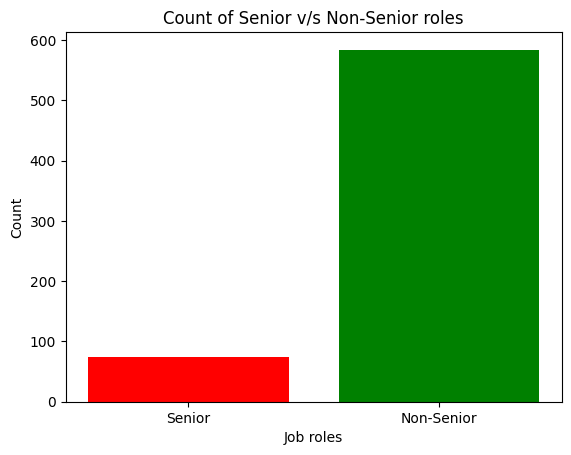

In [ ]:
labels=['Senior','Non-Senior']
roles_count=[senior_roles,non_senior_roles]

plt.title('Count of Senior v/s Non-Senior roles')
plt.xlabel('Job roles')
plt.ylabel('Count')
plt.bar(labels,roles_count,color=['red','green'])
plt.show()

There is 11.38% senior roles and 88.62% junior and mid roles. From the chart, we can see that there are many junior roles compared to senior roles. There are high chances that candidate with no or work experience can apply for junior or mid data science roles.

**Required skills in job roles**

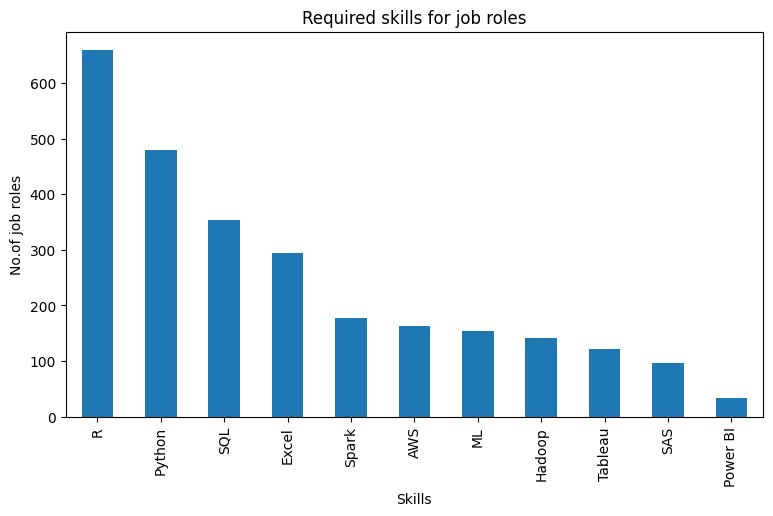

In [ ]:
skills=['Python', 'R','SAS','Excel','SQL','Power BI', 'Tableau', 'Hadoop', 'Spark','ML','AWS']
roles=data[skills].sum()

plt.figure(figsize=(9,5))
roles.sort_values(ascending=False).plot(kind='bar')

plt.title('Required skills for job roles')
plt.xlabel('Skills')
plt.ylabel('No.of job roles')
plt.show()

The top 4 skills required for data science roles is R,Python,SQL and Excel.So,a candidate must be proficient in either R or Python programming languages, SQL and Excel. Here, most of the job descriptions listed R as required skill than Python. From this, we see that R is preferred in most of the companies.

Furthermore, we can check which job roles requested for R.

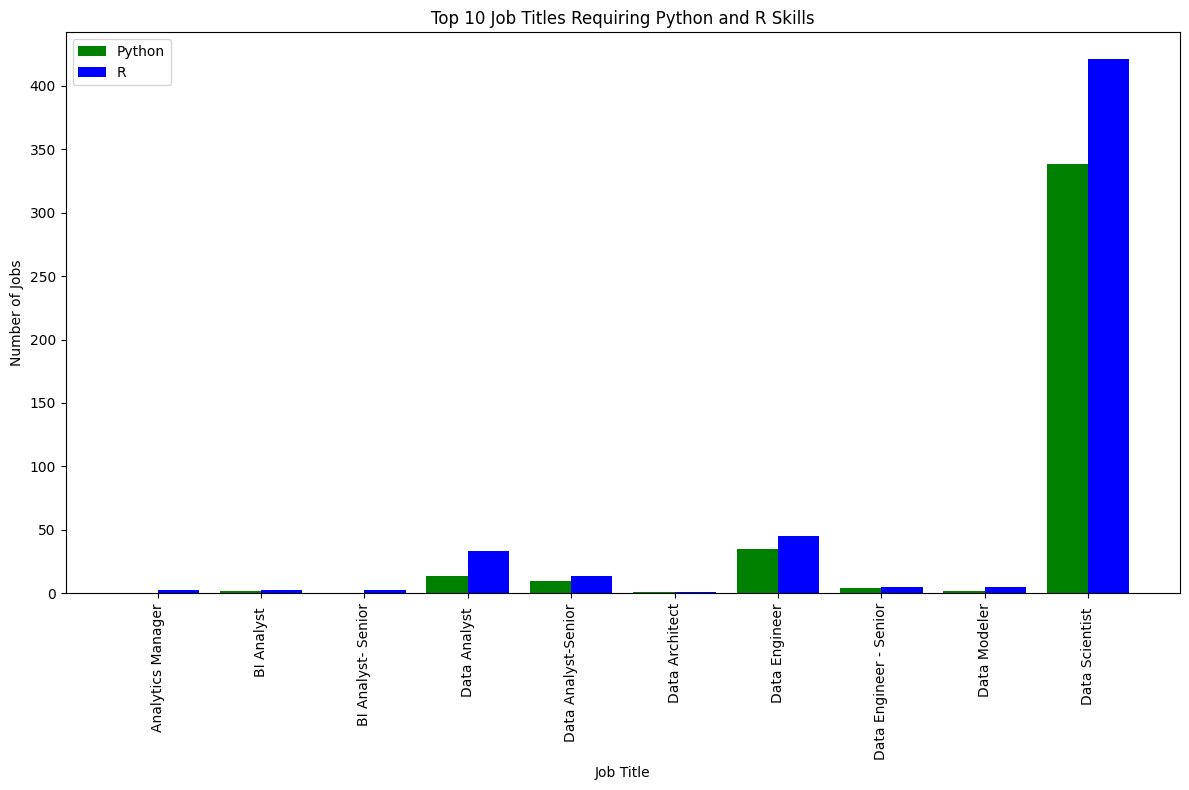

In [ ]:
job_titles_python_r = data[['Updated_Job_Title', 'Python', 'R']]

# Group the DataFrame by 'Job Title' and sum the counts for each skill
grouped_jobs = job_titles_python_r.groupby('Updated_Job_Title').sum()

top_10_jobs = grouped_jobs.head(10)

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Create an array of indices for the x-axis
indices = np.arange(len(top_10_jobs))

ax.bar(indices - 0.2, top_10_jobs['Python'], width=0.4, color='green', label='Python')
ax.bar(indices + 0.2, top_10_jobs['R'], width=0.4, color='blue', label='R')

# Customize x-axis labels and ticks
plt.xticks(indices, top_10_jobs.index, rotation='vertical')
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.title('Top 10 Job Titles Requiring Python and R Skills')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

R is preferred more in job titles than python. If a candidate knows python proficiently, that means he already possess a strong foundation in programming and data analysis. Therefore, With dedication and a strategic approach to acquiring R skills, he/she can successfully make the transition and pursue roles that prefer R.

**No.of jobs available in different sectors**

<Figure size 900x500 with 0 Axes>

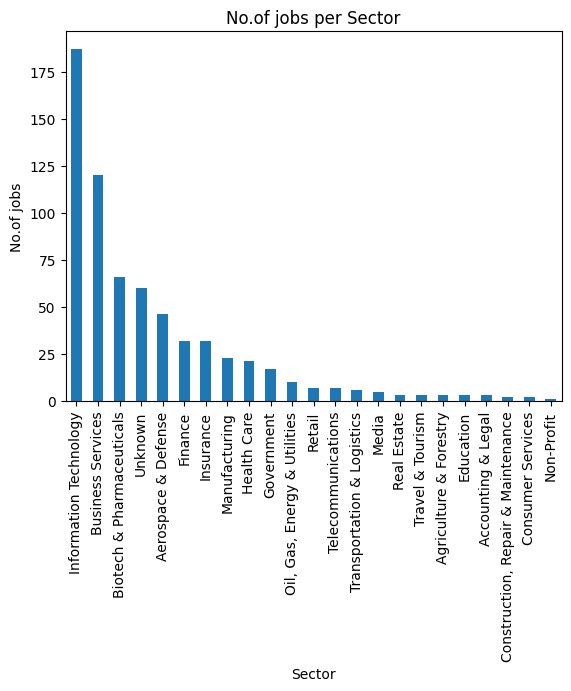

<Figure size 900x500 with 0 Axes>

In [ ]:
sector = data['Sector'].value_counts()
sector.plot(kind='bar')

plt.title('No.of jobs per Sector')
plt.xlabel('Sector')
plt.ylabel('No.of jobs')
plt.figure(figsize=(9,5))

From this chart, information technology will be the suitable sector to apply for data science roles. As the number of job postings is high, the possibility of getting jobs in this sector will be high.

**Salary per sector**

Average Salary

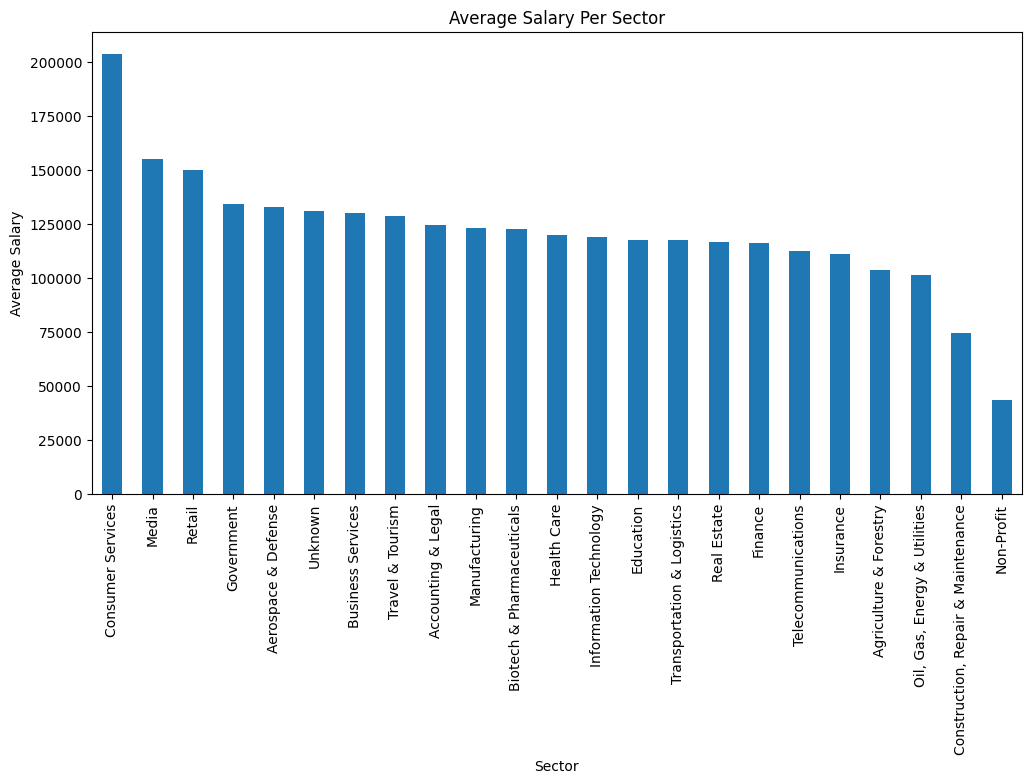

In [ ]:
average_salary_per_sector = data.groupby('Sector')['Avg Salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
average_salary_per_sector.sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.title('Average Salary Per Sector')

# Show the plot
plt.show()

Maximum Salary

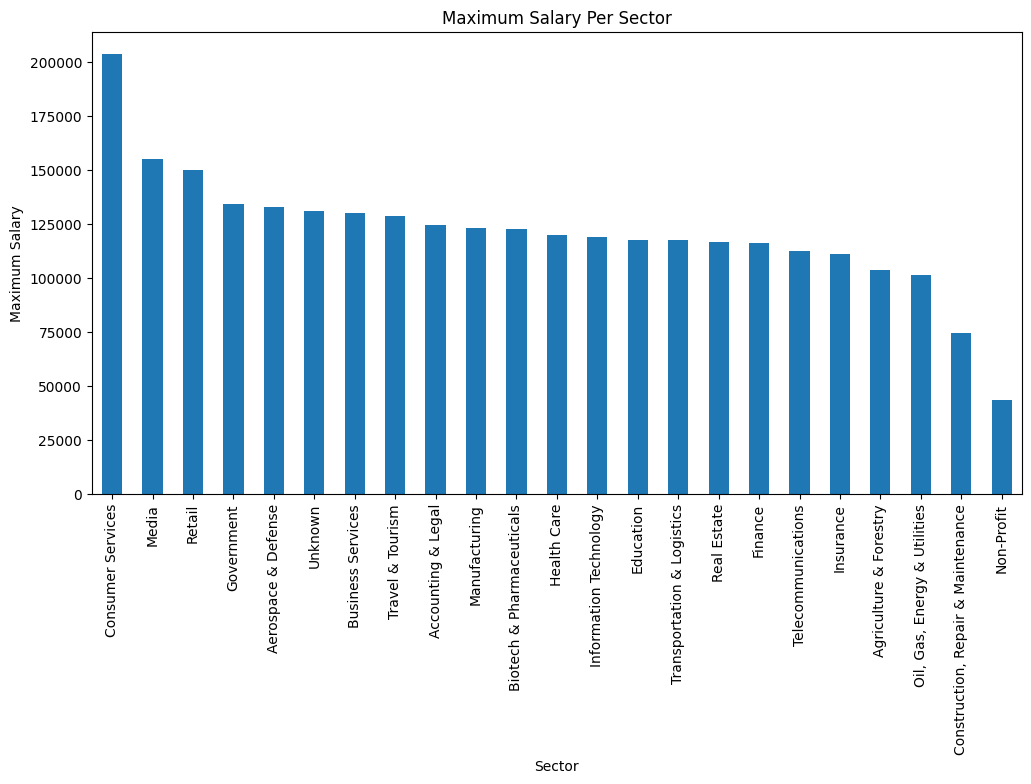

In [ ]:
max_salary_per_sector = data.groupby('Sector')['Max Salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
average_salary_per_sector.sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Maximum Salary')
plt.title('Maximum Salary Per Sector')

# Show the plot
plt.show()

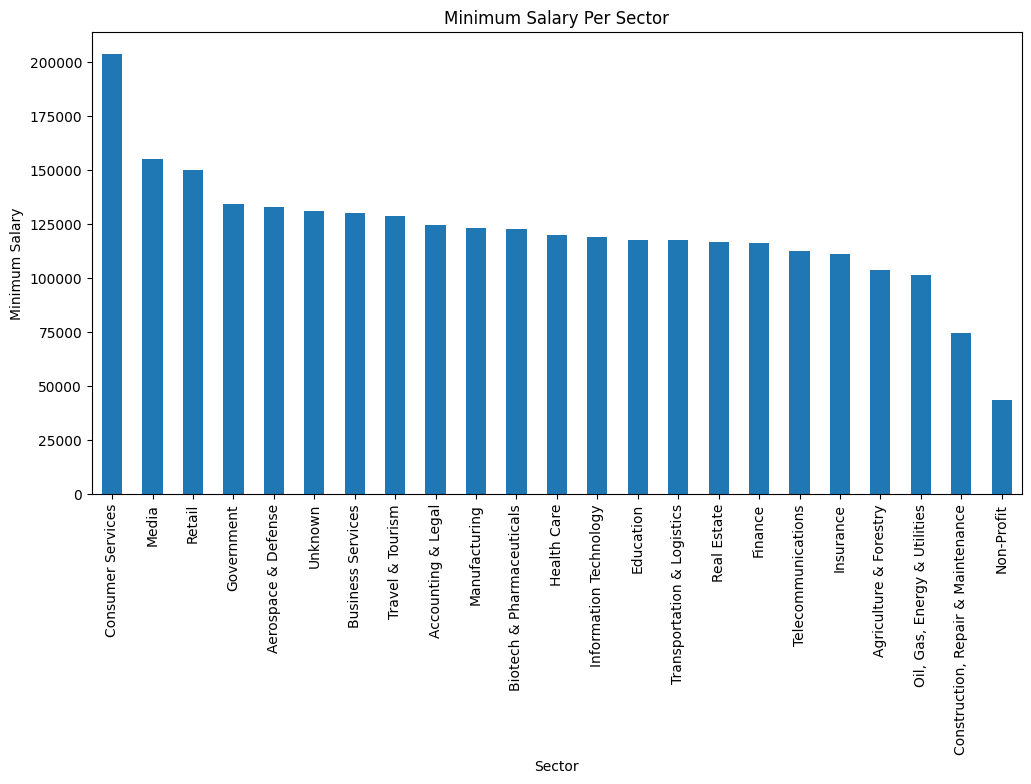

In [ ]:
min_salary_per_sector = data.groupby('Sector')['Min Salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
average_salary_per_sector.sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('Minimum Salary')
plt.title('Minimum Salary Per Sector')

# Show the plot
plt.show()

Cosumer Services and Media has good salary estimates. This information may help job seekers and employers who are applying for job roles.

**Companies with high ratings**

In [ ]:
ratings = data.groupby('Company Name')['Rating'].mean()
companies = ratings[ratings == 5]

print(companies.index.tolist())

['Arsenal Biosciences', 'Averity', 'Blue Horizon Tek Solutions', 'ChaTeck Incorporated', 'Cohere Health', 'Expedition Technology, Inc.', 'Genesis Research', 'JCD Staffing', 'Jobot', 'LifeOmic', 'Maxiom', 'New Iron Group, Inc.', 'Notion Labs', 'PROPRIUS', 'Paige', 'PeopleCom', 'Phantom AI', 'Phoenix Operations Group', 'REE', 'Royce Geospatial', 'SSATI', 'SkillSoniq', 'The Drive Media, Inc.', 'VANTA Partners']


These are the companies having ratings of 5.

**Corelation between Ratings and Salary**

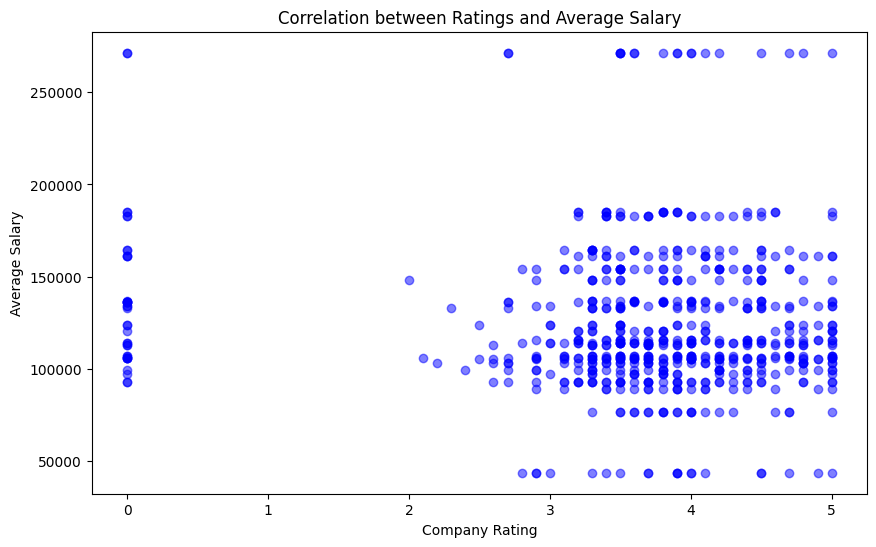

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating'], data['Avg Salary'], color='blue', alpha=0.5)

plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.title('Correlation between Ratings and Average Salary')


plt.show()


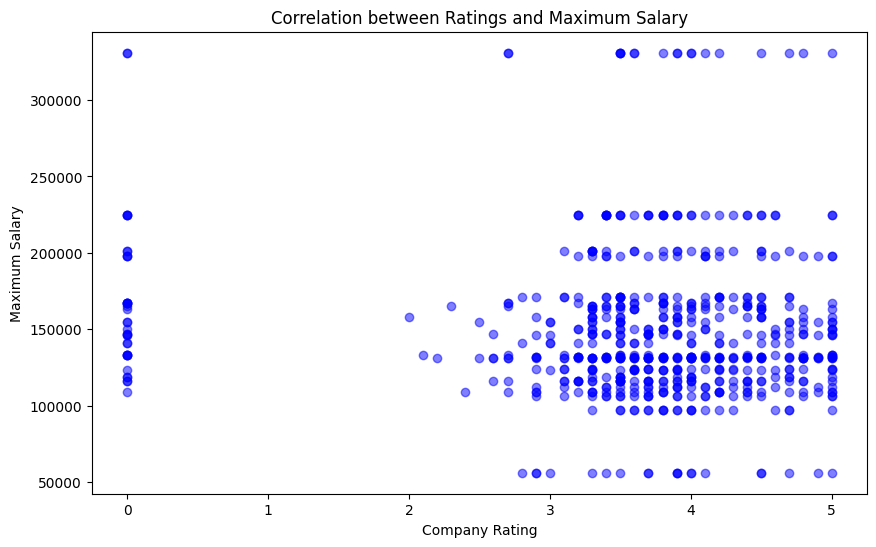

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating'], data['Max Salary'], color='blue', alpha=0.5)

plt.xlabel('Company Rating')
plt.ylabel('Maximum Salary')
plt.title('Correlation between Ratings and Maximum Salary')


plt.show()

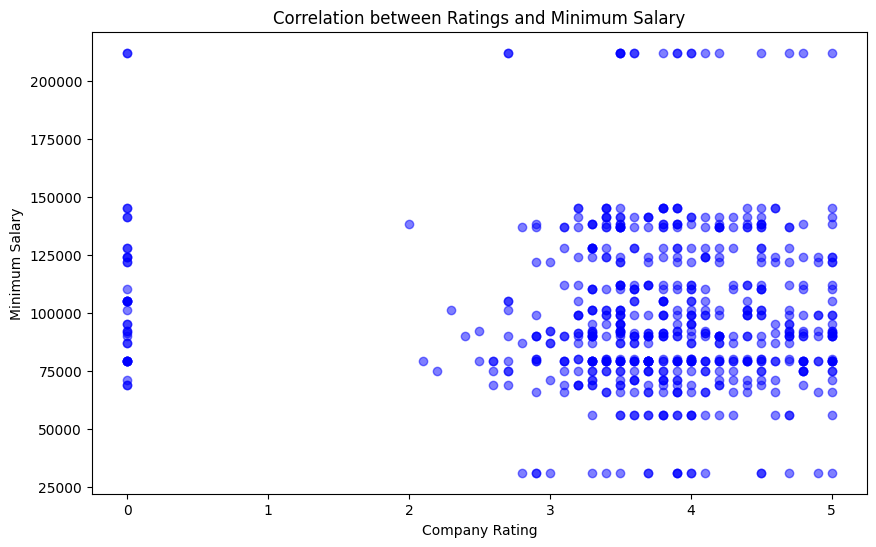

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating'], data['Min Salary'], color='blue', alpha=0.5)

plt.xlabel('Company Rating')
plt.ylabel('Minimum Salary')
plt.title('Correlation between Ratings and Minimum Salary')


plt.show()

It is clear that there is no corelation between salary and ratings.

**Key Insights**

There is significant opportunities for individuals seeking junior and mid-level data science roles. However, it's important to note that there seems to be limited growth potential in senior roles in the field of data science.

When it comes to programming languages, R stands out as the preferred choice among professionals. While R is the favored language, those proficient in Python can strategically transition and secure job roles in R with dedication. It's noteworthy that Data Scientists particularly favor using R in their work.

In terms of sectors, the Information Technology industry appears to be the most suitable environment for individuals looking to apply their data science skills effectively.

For candidates who prioritize salary as their primary consideration, the Consumer Services sector emerges as a suitable choice for applying their data science expertise.

**Conclusion**

As a data analyst, this project has been an insightful journey. Through data preparation and exploration, I've unearthed valuable insights into the data science job market, including patterns, skills in demand, and expectations. I've not only gained a deeper understanding of the industry but have also been able to offer tangible recommendations to both job seekers and employers, contributing to the enhancement of skills and job listings for a more dynamic and competitive data science ecosystem.